# Uso de las funciones creadas sobre la data base (A)

Aquí se presenta la implementación de las funciones ``normal_equation()`` y las funciones de ``gradient descent`` sobre la base de datos (A), las funciones se encuentran dentro del archivo **"multivariate_linear_regression.py"** y serán llamadas a través de las ordenes de importación **from** e **import**:

**from** multivariate_linear_regression **import** ``función``

Los datos de (A) se encuentran dentro de la carpeta _"datos"_ del directorio actual.

## Cargando librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

## Análisis de los datos A

El archivo de datos A: _insurance_ se carga con la librería **pandas** y la función ``read_csv()``, con la función ``head()`` se muestran las primeras 5 filas del dataframe, con ``df.columns`` se obtienen las columnas del dataframe.

In [2]:
df = pd.read_csv('datos/insurance.csv')

In [3]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Con los métodos ``df.info()`` y ``df.describe()`` se describe rápidamente el contenido del df cargado, de la primera se pueden obtener las columnas, el conteo de valores no nulos (o NaN) y el tipo de dato de cada una de éstas, con ``df.describe()`` se obtienen algunos datos estadísticos para las columnas cuyos datos son numericos, además, con la primera fila **count** es posible saber si existen datos faltantes en alguna de las columnas.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Análisis gráfico del contenido del dataframe

#### Edad (age)

Con la librería **seaborns** se obtienen la grafica de distribución de las edades, cond ``kind='hist'`` se define el tipo de gráfico, otra de las opciones es usar ``sns.distplot()``, sin embargo esta ya está obsoleta, así mismo se utiliza la gráfica ``plt.boxplot()`` para encontrar "_outliers_".

Ya que se trata de edades es poco probable encontrar outliers, sin embargo se aplica para mostrar su utilización.

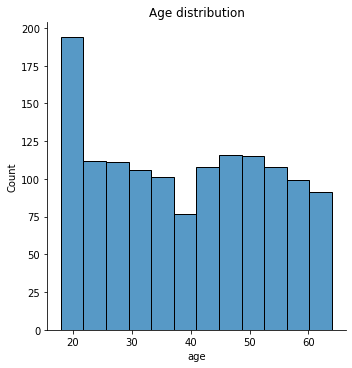

In [7]:
sns.displot(df['age'], kind='hist')
plt.title('Age distribution')
plt.show()

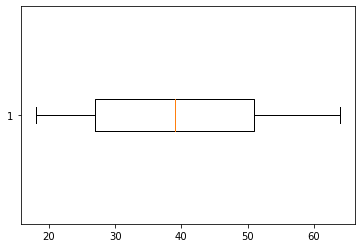

In [8]:
plt.boxplot(df['age'], vert=False)
plt.show()

#### Sexo (sex)

Respecto a la columna "_sex_" se presenta el conteo y la grafica de barras que lo describe, teniendo un total de 662 mujeres y 676 hombres. 
El graficado puede hacer utilizando ``bar`` desde **matplotlib** o ``countplot`` desde **seaborns**, en este caso se muestra el uso de **matplotlib**, donde primero se obtiene el conteo a través del método ``gruopby()`` de pandas.

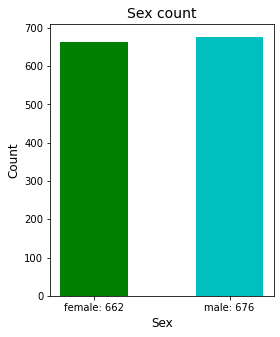

In [9]:
female, male = df.groupby('sex')['sex'].count()
plt.figure(figsize=(4, 5))
plt.bar(['female', 'male'], [female, male], color=['green', 'c'], width=0.5, tick_label=[f'female: {female}', f'male: {male}'])
plt.title('Sex count', size=14)
plt.ylabel('Count', size=12)
plt.xlabel('Sex', size=12)
plt.show()

#### índice de masa corporal (bmi)

Para el índice de masa corporal "_bmi_" la descripción gráfica se realiza a través de la gráfica de distribución, como se mencionó anteriormente existe la opción de graficar utilizando ``distplot()`` desde **seaborns**, aquí se muestra el ejemplo. De la misma manera, debido al tipo de datos se utiliza la gráfica de caja ``boxplot()`` de **seaborns** para identificar los outliers.

/home/saul_gqb/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


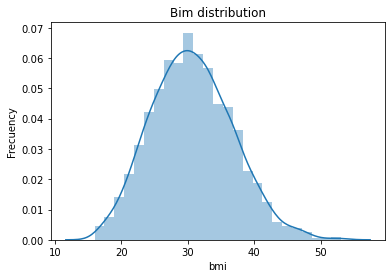

In [10]:
try: 
    sns.distplot(df['bmi'])
except:
    sns.displot(df['bmi'])
plt.title('Bim distribution')
plt.ylabel('Frecuency')
plt.show()

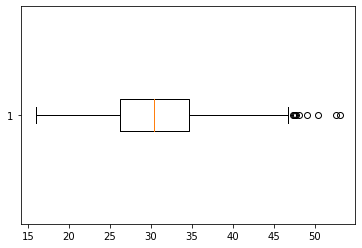

In [11]:
plt.boxplot(df['bmi'], vert=False)
plt.show()

Como puede observarse en el gráfico de caja, existen outlayers, los cuales serán tratados posteriormente con una función elaborada.

#### Hijos (children)

Para la columna "_children_" se presenta una gráfica de barras donde se muestra el conteo del número de hijos, yendo desde 0 hasta 5, teniendo que la mayor frecuencia se encuentra en 0 y la menor en 5.
Esta gráfica se realiza utilizando ``countplot()`` de **seaborns**, que como puede observarse, en comparación con el método utilizado para la columna "_sex_" el código es más corto y el conteo se realiza automáticamente al definir el valor de _x_.

Por la misma naturaleza de los datos no existen outliers. 

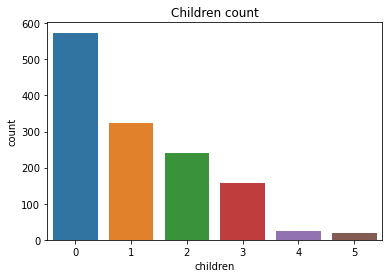

In [12]:
sns.countplot(x=df['children'])
plt.title('Children count')
plt.show()

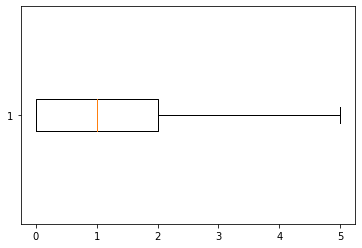

In [13]:
plt.boxplot(df['children'], vert=False)
plt.show()

#### Fumadores

De acuerdo al análisis gráfico, en la mayoría de las muestras se indica que no fuman.

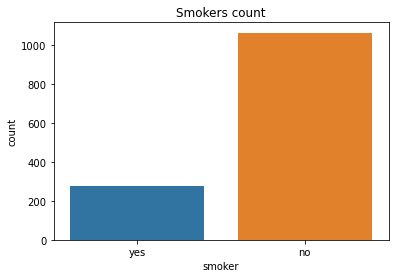

In [14]:
sns.countplot(x=df['smoker'])
plt.title('Smokers count')
plt.show()

#### Región (region)

De este análisis se tiene que existen 4 regiones registradas, las cuales deberán ser convertidas a valores booleanos (1 o 0) para incluirlas en el modelo.

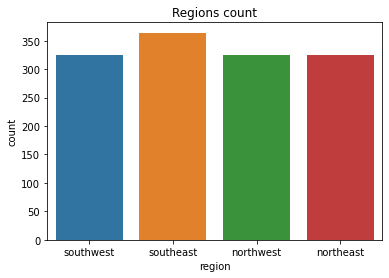

In [15]:
sns.countplot(x=df['region'])
plt.title('Regions count')
plt.show()

#### Cargo (charges)

La columna "_charges_" es la que será utilizada como target de los modelos de regresión lineal y la ecuación normal. Para este caso se describen los datos con la grafica de distribución, donde de primera instancia se observan algunos valores anormales, por lo que también se presenta el gráfico de caja, donde puede observarse que existen datos fuera de los bigotes del gráfico. 

/home/saul_gqb/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


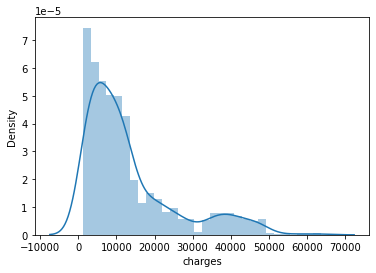

In [16]:
try:
    sns.distplot(df['charges'])
except:
    sns.displot(df['charges'])
    plt.title('Charges distribution')
plt.show()

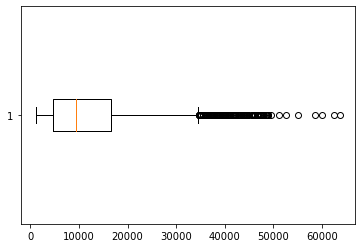

In [17]:
plt.boxplot(df['charges'], vert=False)
plt.show()

### Eliminación de outliers

Como se mostró anteriormente, en la base de datos existen datos anormales u outliers, los cuales pueden tener efectos negativos en la implementación de los modelos de regresión lineal y la ecuación normal, por lo que estos deben removerse del conjunto de datos. Para esto se programaron dos funciones, una que se encarga de identificarlos, a través del primer y tercer cuantil, y otra que se encargará de removerlos del dataframe aún sin tratar (este proceso se lleva a cabo antes de la normalización, pues para ella se utilizan los valores mínimos y máximos). 
La función para identificarlos es ``outliers_detect()``, la funión para removerlos es ``remove_outliers()``, ambas funciones de encuentran en el archivo **outliers_treatment.py**.

* ``outliers_detect()`` detecta los outliers a partir del primer y tercer cuantil, que se utilizan para encontrar los límites inferior y superior (bigotes), esta regresa los índices del dataframe donde se encuentran estos valores anormales.

* ``remove_outliers()`` remueve los filas donde se encuentran los outliers utilizando el método drop() de pandas. 

In [18]:
from outliers_treatment import outliers_detect
index_list = []
# columns = ['bmi', 'charges']
index_list.extend(outliers_detect(df, 'charges'))
len(index_list)

139

In [19]:
from outliers_treatment import remove_outliers
df = remove_outliers(df, index_list)
len(df)

1199

### Transformando las columnas con datos tipo _object_ a valores de 1 y 0

Para utilzar los datos de tipo objeto en los modelos de predicción se realizará la transformación de estos a valores binarios a través del método ``pandas.get_dummies()``, esto se aplicó a las columnas "_sex_", "_smoker_" y "_region_", obteniendo como resultado de aplicar este método los dataframes **genero**, **fumadores** y **region**, con 2, 2 y 4 columnas respectivamente, correspondientes a los diferestes _strings_ de cada columna, por ejemplo, el dataframe **genero** posee las columnas "_male_" y "_female_".

Posteriormente se concatenan los dataframes generados con el dataframe original utilizando la funión ``df.concat()``, (notese que para **genero** y **fumadores** unicamente se concatena una columna, pues solo con esta se obtienen los valores binarios necesarios) y removiendo las columnas con datos de tipo objeto con la función ``df.drop()``.

Por último se cambian los nombres de las columnas para un tratamiento más fácil e intuitivo utilizando la función ``df.rename()``.

In [20]:
genero = pd.get_dummies(df['sex'])
fumadores = pd.get_dummies(df['smoker'])
region = pd.get_dummies(df['region'])
df = pd.concat([df, genero['male'], fumadores['yes'], region], axis=1)
df = df.drop(['sex', 'smoker', 'region'], axis=1)
df = df.rename(columns={'male':'sex', 'yes':'smoker'})

In [21]:
df

,age,bmi,children,charges,sex,smoker,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,1,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,0,1


### Correlación entre las columnas de datos

In [22]:
df.corr()

,age,bmi,children,charges,sex,smoker,northeast,northwest,southeast,southwest
age,1.000000,0.119505,0.040215,0.437642,-0.021252,-0.067391,0.003296,-0.001355,-0.017384,0.015759
bmi,0.119505,1.000000,0.002736,-0.066495,0.027368,-0.255583,-0.132410,-0.119048,0.245156,0.004532
children,0.040215,0.002736,1.000000,0.083713,0.013131,-0.005651,-0.020611,0.013107,-0.018673,0.026425
charges,0.437642,-0.066495,0.083713,1.000000,-0.024358,0.602220,0.063953,0.035171,-0.028649,-0.070884
sex,-0.021252,0.027368,0.013131,-0.024358,1.000000,0.012749,0.000332,0.002604,0.002678,-0.005706
smoker,-0.067391,-0.255583,-0.005651,0.602220,0.012749,1.000000,0.029890,0.017377,-0.002003,-0.045675
northeast,0.003296,-0.132410,-0.020611,0.063953,0.000332,0.029890,1.000000,-0.334413,-0.335884,-0.324120
northwest,-0.001355,-0.119048,0.013107,0.035171,0.002604,0.017377,-0.334413,1.000000,-0.342664,-0.330662
southeast,-0.017384,0.245156,-0.018673,-0.028649,0.002678,-0.002003,-0.335884,-0.342664,1.000000,-0.332116
southwest,0.015759,0.004532,0.026425,-0.070884,-0.005706,-0.045675,-0.324120,-0.330662,-0.332116,1.000000


Los que tienen mayor correlación son age y smoker.

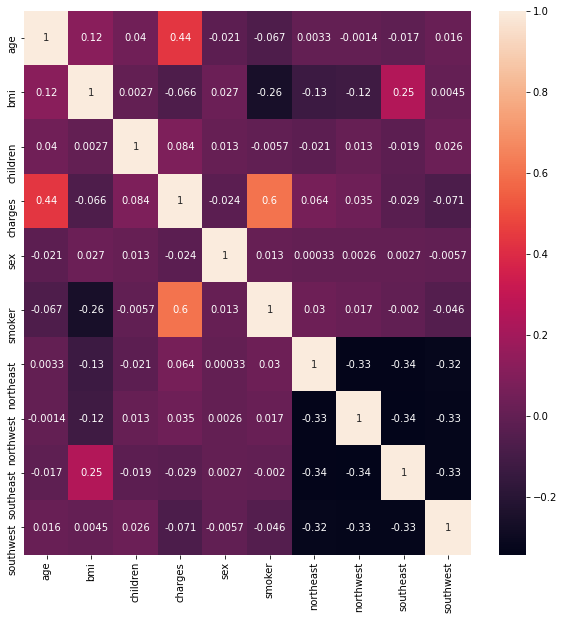

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

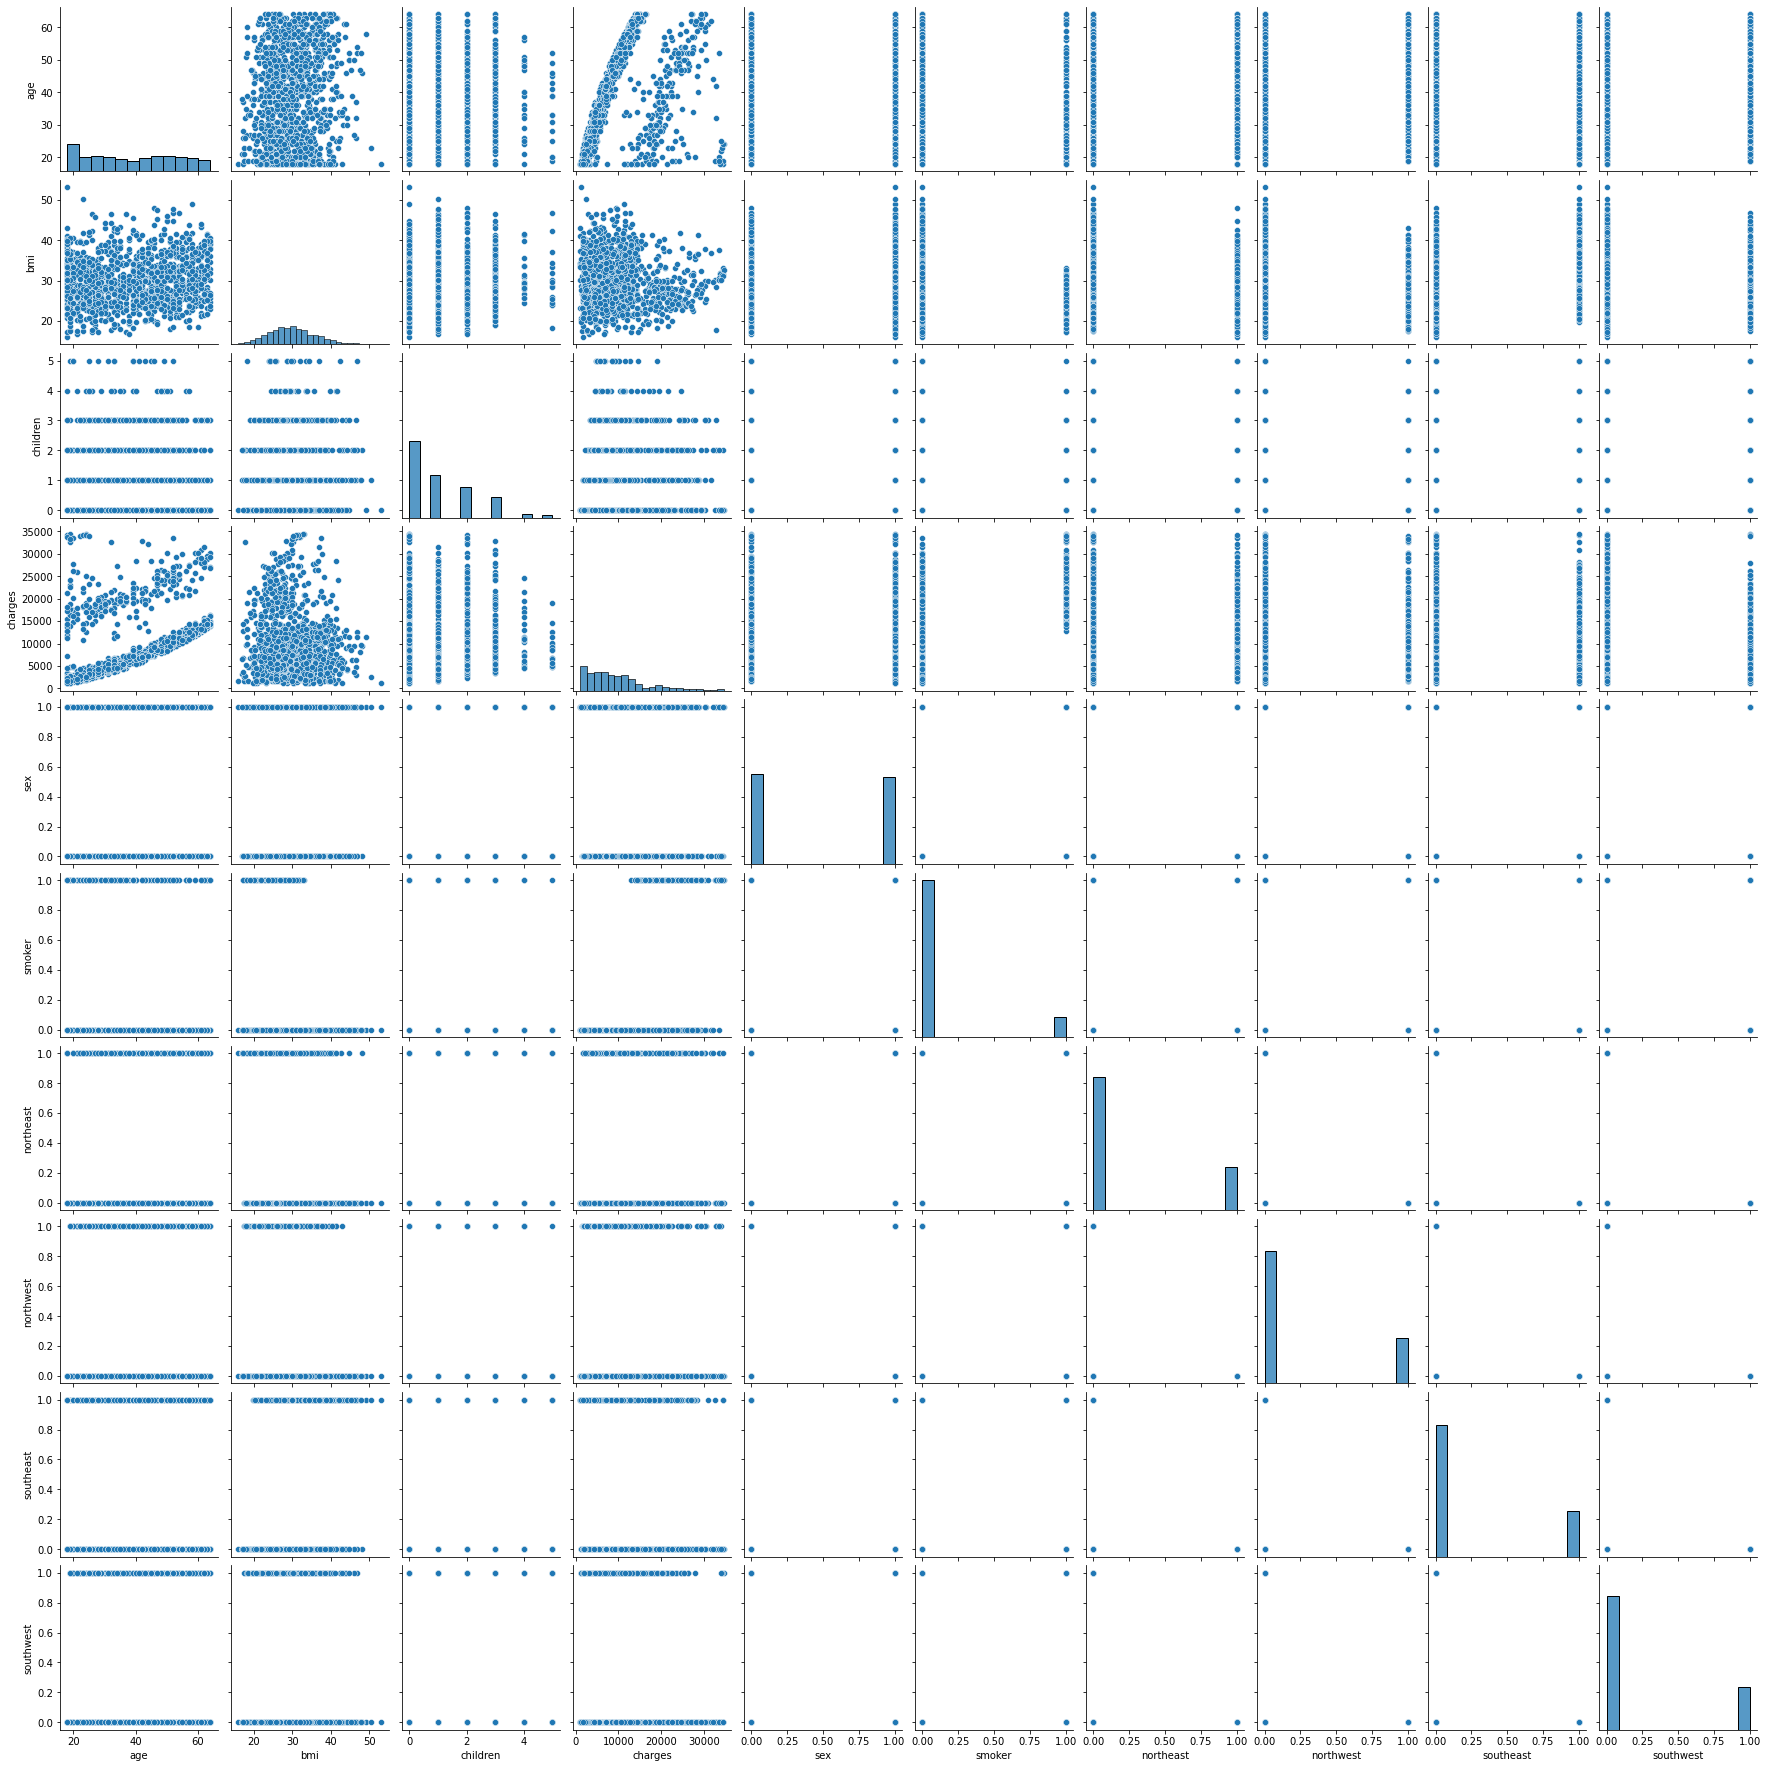

In [24]:
sns.pairplot(df)
plt.show()

### Definición de los features y creación de los dataframes X y Y

In [25]:
df.head(3)

,age,bmi,children,charges,sex,smoker,northeast,northwest,southeast,southwest
0,19,27.90,0,16884.9240,0,1,0,0,0,1
1,18,33.77,1,1725.5523,1,0,0,0,1,0
2,28,33.00,3,4449.4620,1,0,0,0,1,0


In [222]:
X = df[['age', 'bmi', 'children', 'smoker']]# df[['age', 'bmi', 'smoker']]
Y = df[['charges']]

In [223]:
X.head(3)

,age,bmi,children,smoker
0,19,27.90,0,1
1,18,33.77,1,0
2,28,33.00,3,0


In [224]:
Y.head(3)

,charges
0,16884.9240
1,1725.5523
2,4449.4620


## Implementación de los modelos

### Ecuación normal

### Normalizando datos
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_norm = X
X_norm_columns = X.columns
for columna in X_norm_columns:
    X_norm[columna] = scaler.fit_transform(np.c_[X_norm[columna]].reshape(-1, 1))
Y_norm = Y
Y_norm = scaler.fit_transform(np.c_[Y].reshape(-1, 1))
Y_norm = pd.DataFrame(Y_norm)

X

In [225]:
def min_max(df):
    import pandas as pd
    df_min = df.min()
    df_max = df.max()
    df_norm = (df - df_min) / (df_max - df_min)
    df_norm = pd.DataFrame(df_norm)
    return df_norm, df_min, df_max

def denormalize(x_norm, min_x, max_x):
    x = x_norm * (max_x - min_x) + min_x
    return x

In [226]:
X_norm, x_min, x_max = min_max(X)
# Y_norm, Y_min, Y_max = min_max(Y)

In [227]:
## Ver documento multivariate_linear_regression.py
from multivariate_linear_regression import normal_equation

In [239]:
# NO VOLVER A CORRER
percent = 20 
theta, test_index, train_index, Y_predict = normal_equation(X_norm, Y, percent)

In [240]:
print(f'Numero de datos utilizados para el test: {len(test_index)}')
print(f'Numero de datos utilizados para el entrenamiento: {len(train_index)}')

Numero de datos utilizados para el test: 240
Numero de datos utilizados para el entrenamiento: 959


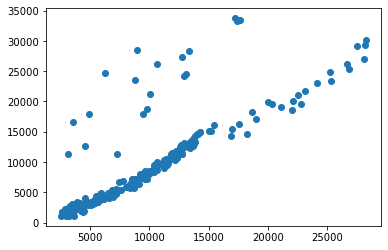

In [241]:
y_test = np.c_[Y.iloc[test_index]]
plt.scatter(Y_predict, y_test)
plt.show()

In [242]:
from sklearn import metrics

print(f'MAE: {metrics.mean_absolute_error(y_test, Y_predict)}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test, Y_predict)}')
print(f'R²: {round(metrics.r2_score(y_test, Y_predict), 2)}')

MAE: 2313.940724767656
MAPE: 0.33480193182262075
R²: 0.68


In [243]:
theta

array([[ 2308.03775011],
       [11168.42271477],
       [ 1296.66092419],
       [ 1942.2948307 ],
       [14339.60528581]])

### Batch Gradient Descent

In [244]:
from multivariate_linear_regression import batch_gradient_descent

In [288]:
percent = 20
epochs = 1000
eta = 0.2
theta, test_index, train_index, Y_predict, J_log = batch_gradient_descent(X_norm, Y, eta, epochs, percent)
Y_predict[1:5]

array([[ 4234.50753465],
       [27963.87239993],
       [12460.75065563],
       [13470.12987196]])

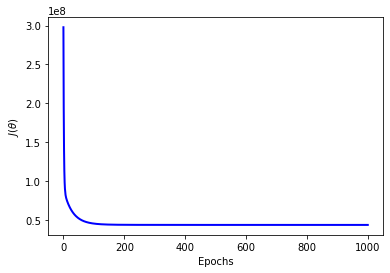

In [289]:
plt.plot(np.arange(epochs), J_log, 'b-', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel(r'$J(\theta)$')
plt.show()

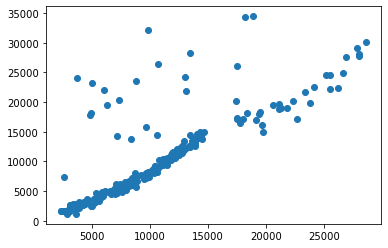

In [290]:
y_test = np.c_[Y.iloc[test_index]]
plt.scatter(Y_predict, y_test)
plt.show()

In [293]:
from sklearn import metrics

print(f'MAE: {round(metrics.mean_absolute_error(y_test, Y_predict),2)}')
print(f'MAPE: {round(metrics.mean_absolute_percentage_error(y_test, Y_predict),2)}')
print(f'R²: {round(metrics.r2_score(y_test, Y_predict), 2)}')

MAE: 2421.8
MAPE: 0.3
R²: 0.65


In [292]:
theta

array([[ 2069.10971678],
       [11342.47881414],
       [ 1591.74704275],
       [ 1972.66730751],
       [14603.06904831]])

### Stochastic Gradiente Descent

### Mini Batch Gradient Descent